# Compare GANs trained on CelebA in terms of sample quality


In [7]:
# @title Setup for colab { display-mode: "form" }

%%capture
!sudo apt-get install subversion
!svn checkout https://github.com/probml/pyprobml/trunk/gan .
!pip install pytorch-lightning einops
!wget https://storage.googleapis.com/probml_data/gan_checkpoints/dcgan_celeba.ckpt
!wget https://storage.googleapis.com/probml_data/gan_checkpoints/sngan_celeba.ckpt
!wget https://storage.googleapis.com/probml_data/gan_checkpoints/gp_wgan_celeba.ckpt
!wget https://storage.googleapis.com/probml_data/gan_checkpoints/wgan_celeba.ckpt
!wget https://storage.googleapis.com/probml_data/gan_checkpoints/logan_celeba.ckpt

In [8]:
# @title Run Setup And Installation { display-mode: "form" }

from utils.plotting import sample_from_truncated_normal
from assembler import get_config, assembler


def make_model(model_name, use_gpu=False):
    fname = f"./configs/{model_name}.yaml"
    config = get_config(fname)
    vae = assembler(config)
    if use_gpu:
        vae = vae.to("cuda")
    return vae


def make_and_load_models(model_names: list, use_gpu=False):
    vaes = []
    for model_name in model_names:
        vae = make_model(model_name, use_gpu)
        vae.load_model()
        vaes.append(vae)
    return vaes

# Compare results

In [9]:
import pytorch_lightning as pl

pl.seed_everything(99)

models_to_compare = ["dcgan", "sngan", "logan", "wgan", "gp_wgan"]
figsize_reconstruction = (10, 30)
figsize_samples = (10, 10)

gans = make_and_load_models(models_to_compare, use_gpu=True)

Global seed set to 99


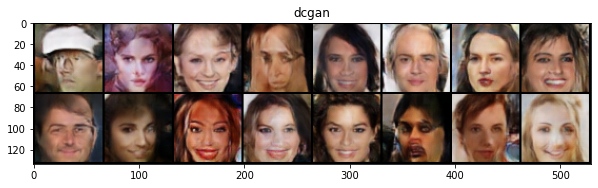

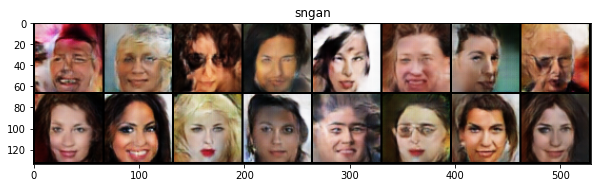

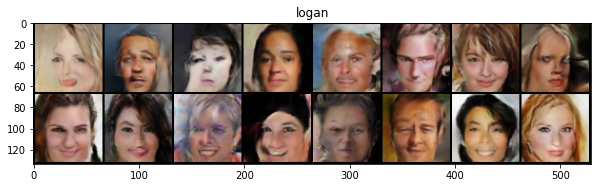

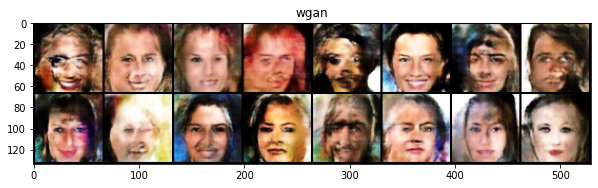

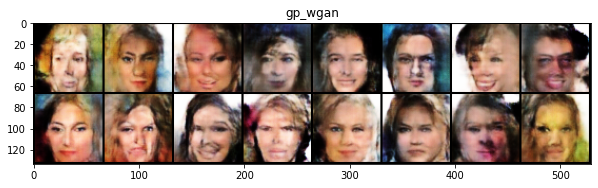

In [10]:
num = 16
sample_from_truncated_normal(gans, num)

# Save figures

In [ ]:
!ls figures

In [ ]:
!rm /content/gan-figs.zip
!zip -r /content/gan-figs.zip /content/figures

In [ ]:
from google.colab import files

files.download("/content/gan-figs.zip")